In [ ]:
import pandas as pd
import numpy as np
 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', penalty='l2', random_state=1))

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=1)

print(train_scores)
# 모델의 각 교차 검증 결과 (10분할) 구나
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.99386503 0.99386503 0.99386503 1.         1.         1.
  1.         1.         1.         1.        ]
 [0.98529412 0.98529412 0.98529412 0.99019608 0.99509804 0.99509804
  0.99509804 0.99509804 0.99509804 0.99509804]
 [0.97959184 0.98367347 0.98367347 0.9877551  0.9877551  0.9877551
  0.9877551  0.9877551  0.9877551  0.9877551 ]
 [0.97902098 0.98601399 0.98251748 0.98951049 0.98951049 0.98951049
  0.98601399 0.98601399 0.98601399 0.98601399]
 [0.98470948 0.98470948 0.98776758 0.98470948 0.99082569 0.99082569
  0.98776758 0.98776758 0.98776758 0.98776758]
 [0.98641304 0.98641304 0.98913043 0.98913043 0.99184783 0.98913043
  0.98913043 0.98913043 0.98913043 0.98913043

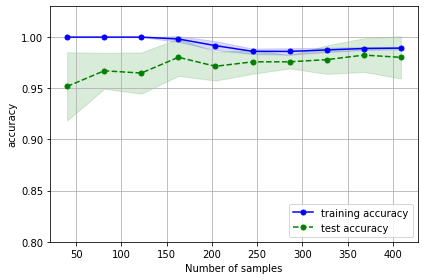

In [ ]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 color='blue',
                 alpha=0.15)

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='o', markersize=5, label='test accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 color='green',
                 alpha=0.15)
#plt.scale('log')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Number of samples')
plt.ylabel('accuracy')

plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

[[0.94132029 0.93398533 0.94132029 0.93887531 0.94376528 0.94146341
  0.94146341 0.94390244 0.94146341 0.93902439]
 [0.97310513 0.97066015 0.97066015 0.96821516 0.97799511 0.97560976
  0.97317073 0.96585366 0.97073171 0.97073171]
 [0.98533007 0.98533007 0.98533007 0.98288509 0.98777506 0.98780488
  0.98780488 0.98292683 0.98536585 0.98536585]
 [0.98777506 0.98777506 0.99022005 0.99022005 0.99022005 0.9902439
  0.9902439  0.98780488 0.9902439  0.98780488]
 [0.98533007 0.98777506 0.98533007 0.99266504 0.99266504 0.9902439
  0.9902439  0.98780488 0.9902439  0.98780488]
 [0.99022005 0.99022005 0.99022005 0.99511002 1.         0.9902439
  0.9902439  0.99512195 0.99268293 0.98780488]]


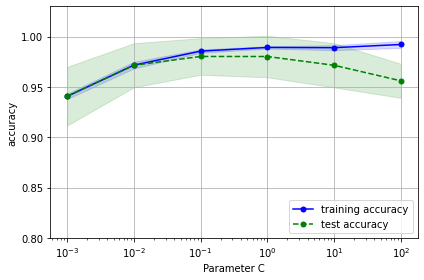

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores , test_scores = validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv = 10
)

print(train_scores)
# 모델의 각 교차 검증 결과 (10분할) 구나
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 color='blue',
                 alpha=0.15)

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='o', markersize=5, label='test accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 color='green',
                 alpha=0.15)

plt.xscale('log')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('accuracy')

plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()